In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


In [ ]:
# Load dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channels (for MNIST: 28x28x1, for CIFAR-10: 32x32x3)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


In [ ]:
# Encoder
input_img = Input(shape=(28, 28, 1))  # Change to (32, 32, 3) for CIFAR-10
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Use 3 channels for CIFAR-10

# Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.fit(
    x_train, x_train,
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.2278 - val_loss: 0.0797
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0786 - val_loss: 0.0739
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0741 - val_loss: 0.0715
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0719 - val_loss: 0.0702
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0706 - val_loss: 0.0692
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0697 - val_loss: 0.0685
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0690 - val_loss: 0.0680
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0686 - val_loss: 0.0674
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0677 - val_loss: 0.0668
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0668 - val_loss: 0.0661
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


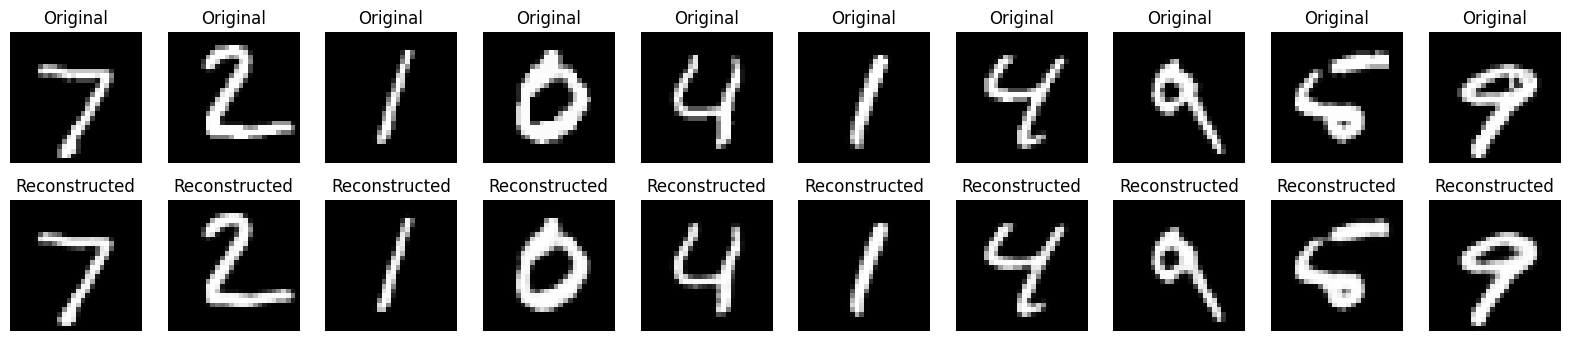

In [ ]:
# Encode and decode some images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [ ]:
# Flatten images for MSE calculation
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_flat = decoded_imgs.reshape(len(decoded_imgs), -1)

# Compute MSE
mse = mean_squared_error(x_test_flat, decoded_imgs_flat)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0016708275070413947


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


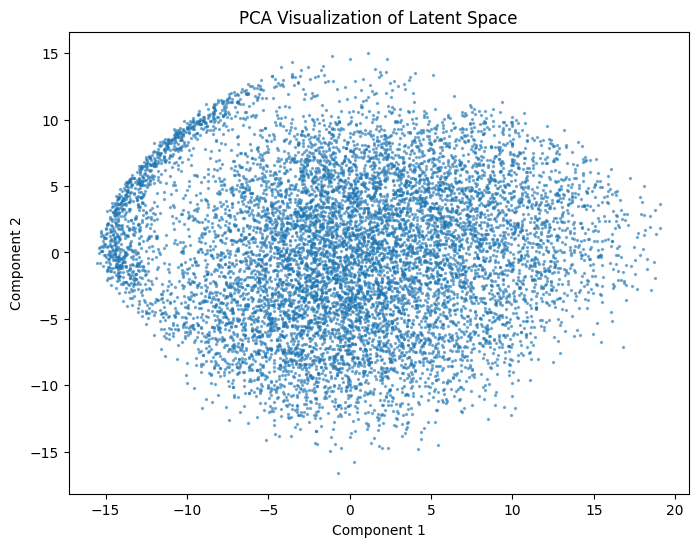

In [ ]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Flatten the encoded images for visualization
encoded_imgs_flat = encoded_imgs.reshape(len(encoded_imgs), -1)

# Visualize using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_imgs_flat)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=2, alpha=0.5)
plt.title("PCA Visualization of Latent Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

1. How does the CNN autoencoder perform in reconstructing images?

- The CNN autoencoder typically performs well in reconstructing the spatial
  features of the images. The reconstructed images closely resemble the originals, though some fine details may be lost depending on the compression in the latent space. The Mean Squared Error quantifies the reconstruction error.

2. What insights do you gain from visualizing the latent space?

- PCA and t-SNE reveal the clustering of similar features in the latent space,  
  showing how the encoder extracts meaningful compressed representations of the data.Observing distinct clusters indicates the autoencoder’s ability to differentiate between different image patterns or classes effectively.






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split



# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Ensure that the 'Month' column remains in the DataFrame
data['Month'] = pd.to_datetime(data['Month'])


In [ ]:
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
# Load your data and ensure 'Month' is in datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Normalize the 'Passengers' data
data_values = data[['Passengers']].values
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_values)

# Parameters for the LSTM
sequence_length = 12  # Number of time steps in each input sequence
batch_size = 32

# Trim the data to ensure it's a multiple of sequence_length
trimmed_size = (len(data_normalized) // sequence_length) * sequence_length
data_normalized = data_normalized[:trimmed_size]

# Split the dataset into sequences
X, y = [], []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i + sequence_length])
    y.append(data_normalized[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Train-test split (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Verify the shapes after reshaping
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Build the LSTM Autoencoder
inputs = Input(shape=(sequence_length, 1))

# Encoder: Stacked LSTM layers
encoded = LSTM(200, activation='relu', return_sequences=True)(inputs)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(100, activation='relu')(encoded)

# Latent space (latent representations for classification)
latent_space = Dense(50, activation='relu')(encoded)

# Decoder: Symmetrical structure with LSTM layers
encoded_for_decoder = RepeatVector(sequence_length)(latent_space)
decoded = LSTM(100, activation='relu', return_sequences=True)(encoded_for_decoder)
decoded = LSTM(200, activation='relu', return_sequences=True)(decoded)

# Output layer for reconstruction
outputs = Dense(1, activation='linear')(decoded)

# Define the autoencoder model
autoencoder = Model(inputs, outputs)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=300, batch_size=batch_size, validation_data=(X_test, X_test))

# Calculate Mean Squared Error for reconstruction
predictions = autoencoder.predict(X_test)
reconstructed_sequences = predictions.reshape(-1, 1)

# Inverse scaling to get back to the original scale
reconstructed_sequences = scaler.inverse_transform(reconstructed_sequences)
original_sequences = scaler.inverse_transform(X_test.reshape(-1, 1))



# Use the Encoder to extract latent features for classification
encoder = Model(inputs, latent_space)
latent_features = encoder.predict(X)

# Binary labels for the classification task
labels = (data_normalized[sequence_length:] > 0.5).astype(int).reshape(-1, 1)

# Train-test split for the classification task
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    latent_features, labels, test_size=0.2, random_state=42
)



X_train shape: (105, 12, 1), X_test shape: (27, 12, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 12, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 12, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 12, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12, 1)               │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 588,451 (2.24 MB)

 Trainable params: 588,451 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 0.0946 - val_loss: 0.3869
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0902 - val_loss: 0.3808
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0916 - val_loss: 0.3741
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0856 - val_loss: 0.3666
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0869 - val_loss: 0.3578
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0827 - val_loss: 0.3474
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0778 - val_loss: 0.3351
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0748 - val_loss: 0.3205
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0746 - val_loss: 0.3029
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0679 - val_loss: 0.2816
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0553 - val_loss: 0.2557
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0511 - val_los

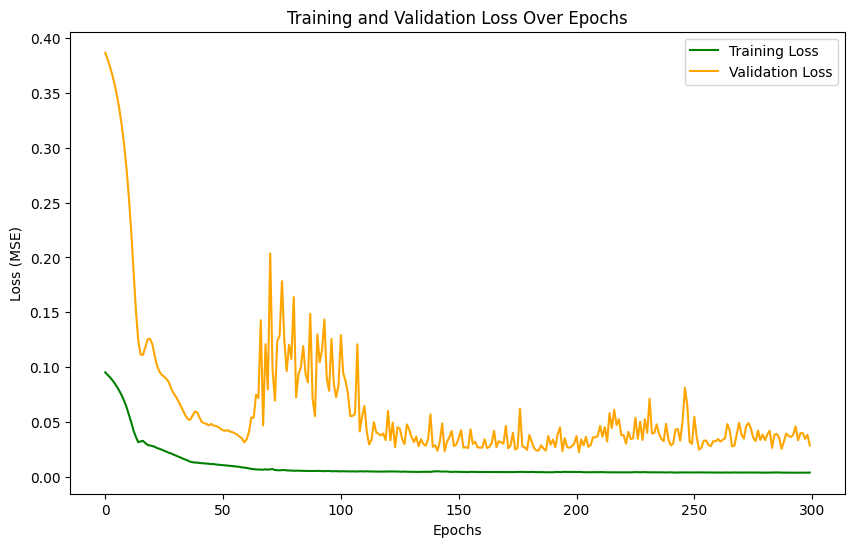

In [ ]:
# Plot training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

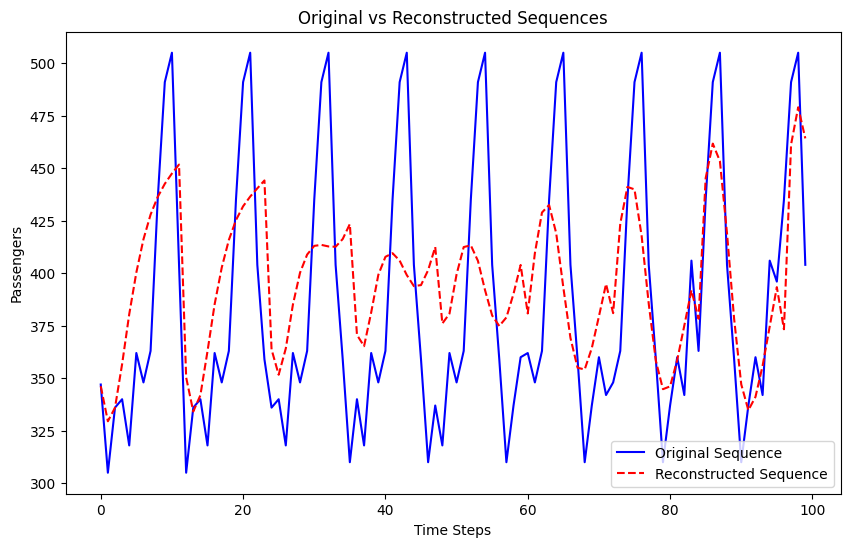

In [ ]:

# Visualize original vs reconstructed sequences
plt.figure(figsize=(10, 6))
plt.plot(original_sequences[:100], label='Original Sequence', color='blue')
plt.plot(reconstructed_sequences[:100], label='Reconstructed Sequence', color='red', linestyle='--')
plt.title('Original vs Reconstructed Sequences')
plt.xlabel('Time Steps')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
# Calculate MSE for reconstruction
mse = mean_squared_error(original_sequences, reconstructed_sequences)
print(f"Mean Squared Error (MSE) of Reconstruction: {mse}")

Mean Squared Error (MSE) of Reconstruction: 7612.649622463886


In [ ]:
# Build a simple classification model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

classification_model = Sequential([
    Dense(32, activation='relu', input_shape=(50,)),
    Dense(1, activation='sigmoid')
])

# Compile the classification model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
classification_model.fit(X_train_class, y_train_class, epochs=100, batch_size=32, validation_data=(X_test_class, y_test_class))

# Evaluate the classification accuracy
classification_loss, classification_accuracy = classification_model.evaluate(X_test_class, y_test_class, verbose=1)

# Print the classification accuracy
print(f"Classification Accuracy: {classification_accuracy:.2f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.7083 - loss: 1.2004 - val_accuracy: 0.8519 - val_loss: 0.7717
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7135 - loss: 0.9692 - val_accuracy: 0.8519 - val_loss: 0.7058
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7020 - loss: 0.8402 - val_accuracy: 0.8519 - val_loss: 0.6784
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7270 - loss: 0.7171 - val_accuracy: 0.8519 - val_loss: 0.6720
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6771 - loss: 0.6891 - val_accuracy: 0.7037 - val_loss: 0.6787
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6500 - loss: 0.6794 - val_accuracy: 0.4444 - val_loss: 0.6854
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5230 - loss: 0.6787 - val_accuracy: 0.4444 - val_loss: 0.6890
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5425 - loss: 0.6723 - val_accuracy: 0.4444 - val_loss: 0.6892
Epo

# **Evaluation of LSTM Autoencoder Performance**

## 1. How Well Does the LSTM Autoencoder Reconstruct the Sequences?

The LSTM Autoencoder's reconstruction quality can be assessed using both visual and quantitative methods:

### **Visual Inspection**
- We can visually compare the original and reconstructed sequences using the plot below:
  - **Good Reconstruction**: If the reconstructed sequence (red dashed line) closely follows the original sequence (blue line), the autoencoder is effectively capturing the underlying patterns.
  - **Poor Reconstruction**: A noticeable deviation between the original and reconstructed sequences suggests the model might not be capturing essential data features.

### **Quantitative Metrics**
- Metrics such as **Mean Squared Error (MSE)** or **Root Mean Squared Error (RMSE)** are commonly used to evaluate reconstruction quality.
  - Lower MSE/RMSE values indicate better reconstruction performance.
  - The training history's loss curve (like the one from the `history` object) can show how the reconstruction error decreases over epochs, indicating model improvement.

---

## 2. How Does the Choice of Latent Space Dimensionality Affect Reconstruction Quality and Compression?

The dimensionality of the **latent space** (the number of features in the encoded representation) plays a crucial role in determining the trade-off between **reconstruction quality** and **compression**.

### **Effect on Reconstruction Quality**
- **Higher Dimensionality**:
  - Allows the model to capture more detailed patterns.
  - Typically results in **better reconstruction quality**.
  - Can lead to **overfitting** if the dimensionality is too high, causing the model to memorize training data rather than generalize.

- **Lower Dimensionality**:
  - Forces the model to compress information, potentially discarding less critical details.
  - Might lead to **loss of reconstruction quality** if the dimensionality is too low.
  - Useful for **dimensionality reduction** when capturing key features efficiently is the goal.

### **Effect on Compression**
- **Smaller Latent Space**:
  - Provides higher levels of **compression**, reducing storage and memory needs.
  - Excessive compression might degrade reconstruction quality and result in loss of important information.

- **Larger Latent Space**:
  - Results in lower compression but retains more information.
  - Useful when precise reconstruction is crucial and resource constraints are not a concern.

### **Balancing Quality and Compression**
- Finding the optimal latent space dimensionality is about finding a balance between quality and efficiency.
- Some practical strategies to help with this decision:
  - **Grid Search**: Experiment with a range of dimensions (e.g., 20, 50, 100) to identify the best trade-off.
  - **Visual Inspection**: Compare the reconstruction for different latent dimensions to see what works best.
  - **Elbow Method**: Plot reconstruction error against the latent space dimension and look for the "elbow" point where increasing dimensionality yields diminishing returns.



# **Comparison of CNN and LSTM Autoencoders**

## 1. How efficient are CNN and LSTM Autoencoders in Feature Extraction for Spatial vs. Sequential Data?

### **Answer**:
#### **CNN Autoencoders**
- **Feature Extraction in Spatial Data**:
  - CNNs are designed for **spatial data** (like images or grid-like structures). They are excellent at identifying **local patterns** using convolutional filters that detect features such as edges, textures, and shapes.
  - CNN autoencoders excel in tasks where **spatial hierarchy** (e.g., pixels in images) is important. They capture information from small areas (local filters) and build up to more complex representations (deep layers).
  - Efficient at reducing noise and extracting relevant features in images, making them popular for image compression and denoising tasks.

#### **LSTM Autoencoders**
- **Feature Extraction in Sequential Data**:
  - LSTMs are designed for **sequential data** (like time series, text, or audio). They are adept at capturing **temporal dependencies** due to their memory cell structure.
  - LSTM autoencoders are more effective at understanding patterns over **longer sequences**, retaining information from earlier data points to predict or reconstruct future ones.
  - They are efficient when relationships are spread across time steps, like in forecasting, anomaly detection in time series, or text comprehension.

#### **Key Takeaway**:
- **CNNs** are the go-to choice for spatial feature extraction, while **LSTMs** shine in sequential contexts where temporal dependencies matter.

---

## 2. How do CNN and LSTM Autoencoders compare in terms of the quality of Dimensionality Reduction?

### **Answer**:
#### **CNN Autoencoders**
- **Dimensionality Reduction**:
  - CNN autoencoders perform dimensionality reduction by learning spatial hierarchies, compressing information through **pooling** and **convolutions**.
  - Quality of reduction is excellent for spatial data; the network reduces spatial dimensions while retaining core features, leading to effective **compression**.
  - In image data, CNN autoencoders can produce high-quality reconstructions even with substantial reduction in data size.

#### **LSTM Autoencoders**
- **Dimensionality Reduction**:
  - LSTM autoencoders reduce dimensionality by compressing temporal patterns into a smaller latent space, capturing essential temporal information.
  - Quality of reduction can be high for sequential data, but may struggle with very high-dimensional spatial data (like raw images) since LSTMs handle temporal sequences better.
  - Good at reducing time-series data while preserving trend information, seasonal patterns, and temporal dependencies.

#### **Key Takeaway**:
- **CNNs** provide superior dimensionality reduction for spatial data, while **LSTMs** are better for compressing and representing temporal sequences.

---

## 3. What are the potential real-world applications of CNN and LSTM Autoencoders?

### **Answer**:
#### **CNN Autoencoders**
- **Image Compression and Denoising**:
  - Effective at compressing images without losing significant detail, useful for data storage and transmission.
  - Commonly applied in noise removal and **image reconstruction** tasks.
- **Anomaly Detection in Images**:
  - Can identify unusual patterns in images, making them useful for **medical imaging** (e.g., identifying tumors) and **quality control** (detecting defects in manufacturing).
- **Content-Based Image Retrieval**:
  - Helps in indexing and searching images by visual similarity, used in **recommendation systems**.

#### **LSTM Autoencoders**
- **Time Series Forecasting**:
  - Useful in predicting future trends in data like stock prices, weather, or energy consumption by capturing temporal patterns.
- **Anomaly Detection in Time Series**:
  - Identifies unusual patterns over time, making it suitable for **fraud detection**, network traffic monitoring, and predictive maintenance.
- **Natural Language Processing (NLP)**:
  - Effective in **text reconstruction**, machine translation, and detecting anomalies in language data.

#### **Key Takeaway**:
- **CNN Autoencoders** are best suited for tasks involving spatial data like images, while **LSTM Autoencoders** excel in temporal data analysis, forecasting, and NLP-related tasks.
